# Model for classifying whether a blood smear is uninfected or parasitized

## CEMA internship shortlisting assignment - computer science track

### By Dominic Makana Ocharo
### ocharodominic01@gmail.com
### +254746073062

## Introduction
### Advanced technology and AI are playing a crucial role in combating malaria, a disease affecting millions annually. This deep learning model with a high accuracy rate is a notable advancement, potentially improving malaria detection and accelerating treatment, potentially saving lives worldwide.

 # BASIC LIBRARY IMPORTS

In [8]:
# pip install tensorflow_datasets==4.9.2

In [4]:
# Basic imports
# pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os

from tensorflow.keras.layers import Dense , InputLayer , Conv2D , MaxPool2D , Flatten , BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

C:\Users\Dell Latitude E6410\Documents\python projects\tfenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#  IMPORTING THE DATASET

In [134]:
dataset , dataset_info = tfds.load('malaria' , with_info=True , as_supervised = True , shuffle_files = True , split=['train'])
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='C:\\Users\\Dell Latitude E6410\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite det

# DISPLAYING THE CLASS NAMES

In [135]:
class_names = dataset_info.features['label'].names
class_names

['parasitized', 'uninfected']

# DATA SPLITTING

In [11]:
def splits(dataset , TRAIN_RATIO , VAL_RATIO , TEST_RATIO):
    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))

    val_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
    val_dataset = dataset.take(int(VAL_RATIO * DATASET_SIZE))

    test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
    test_dataset = dataset.skip(int(VAL_RATIO * DATASET_SIZE))
    test_dataset = dataset.take(int(TEST_RATIO * DATASET_SIZE))

    return train_dataset , val_dataset , test_dataset


train_dataset , val_dataset , test_dataset = splits(dataset[0] , 0.6 , 0.2 , 0.2)

# DATA VISUALIZATION

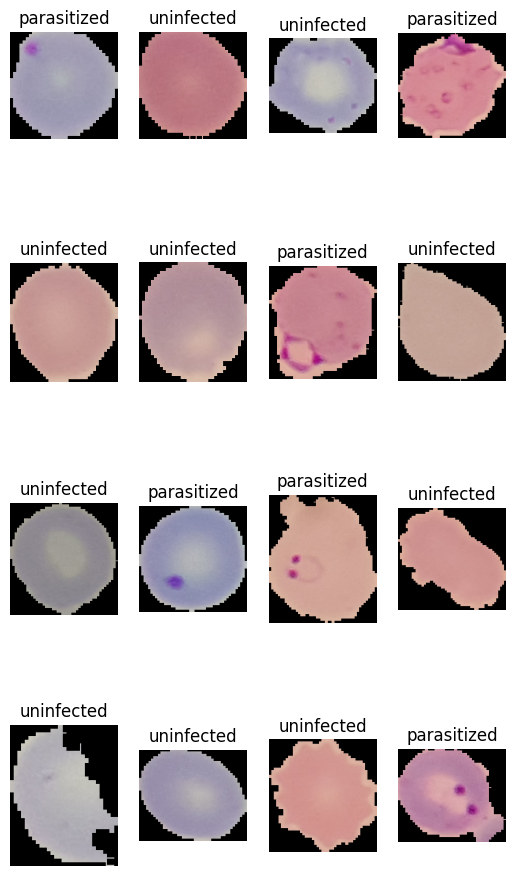

In [12]:
for i , (image,label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4 ,i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(dataset_info.features['label'].int2str(label))
    plt.subplots_adjust(top=2)

# IMAGE / DATA PREPROCESSING

In [13]:
IMG_SIZE = 224
def resize_rescale(image , label):
    return tf.image.resize(image , (IMG_SIZE,IMG_SIZE))/255.0 , label

train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

train_dataset = train_dataset.shuffle(buffer_size = 8 , reshuffle_each_iteration = True ).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8 , reshuffle_each_iteration = True ).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1)

# MODEL BUILDING

In [14]:
model = Sequential([

    InputLayer(input_shape=(IMG_SIZE,IMG_SIZE,3)),

    Conv2D(filters=6 , kernel_size=5 , strides=1 ,padding ='valid' , activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2 , strides =2 ),

    Conv2D(filters=16 , kernel_size=5 , strides=1 ,padding ='valid' , activation='relu'),
    MaxPool2D(pool_size=2 , strides =2 ),

    Flatten(),

    Dense(100 , activation='relu'),
    BatchNormalization(),
    Dense(10 , activation='relu'),
    Dense(1 , activation='sigmoid')

])

# MODEL COMPILATION , TRAINING AND EVALUATION

In [15]:
# Compilation

model.compile(optimizer=Adam(learning_rate=0.01) , loss = BinaryCrossentropy(), metrics='accuracy')

# Training

history =  model.fit(train_dataset , validation_data = val_dataset, epochs = 30, verbose = 1)

# Evaluation
model.evaluate(test_dataset)

Epoch 1/30
517/517 [==============================] - 2000s 4s/step - loss: 0.4406 - accuracy: 0.7949 - val_loss: 0.9967 - val_accuracy: 0.4859
Epoch 2/30
517/517 [==============================] - 1724s 3s/step - loss: 0.2206 - accuracy: 0.9245 - val_loss: 0.1798 - val_accuracy: 0.9354
Epoch 3/30
517/517 [==============================] - 1880s 4s/step - loss: 0.1812 - accuracy: 0.9413 - val_loss: 0.1392 - val_accuracy: 0.9555
Epoch 4/30
517/517 [==============================] - 2895s 6s/step - loss: 0.1573 - accuracy: 0.9491 - val_loss: 0.1907 - val_accuracy: 0.9354
Epoch 5/30
517/517 [==============================] - 2450s 5s/step - loss: 0.1367 - accuracy: 0.9550 - val_loss: 0.1492 - val_accuracy: 0.9421
Epoch 6/30
517/517 [==============================] - 1945s 4s/step - loss: 0.1211 - accuracy: 0.9584 - val_loss: 0.1500 - val_accuracy: 0.9510
Epoch 7/30
517/517 [==============================] - 3013s 6s/step - loss: 0.1093 - accuracy: 0.9610 - val_loss: 0.1096 - val_accuracy:

[0.058616239577531815, 0.9784068465232849]

# VISUALIZING ACCURACY AND LOSSES

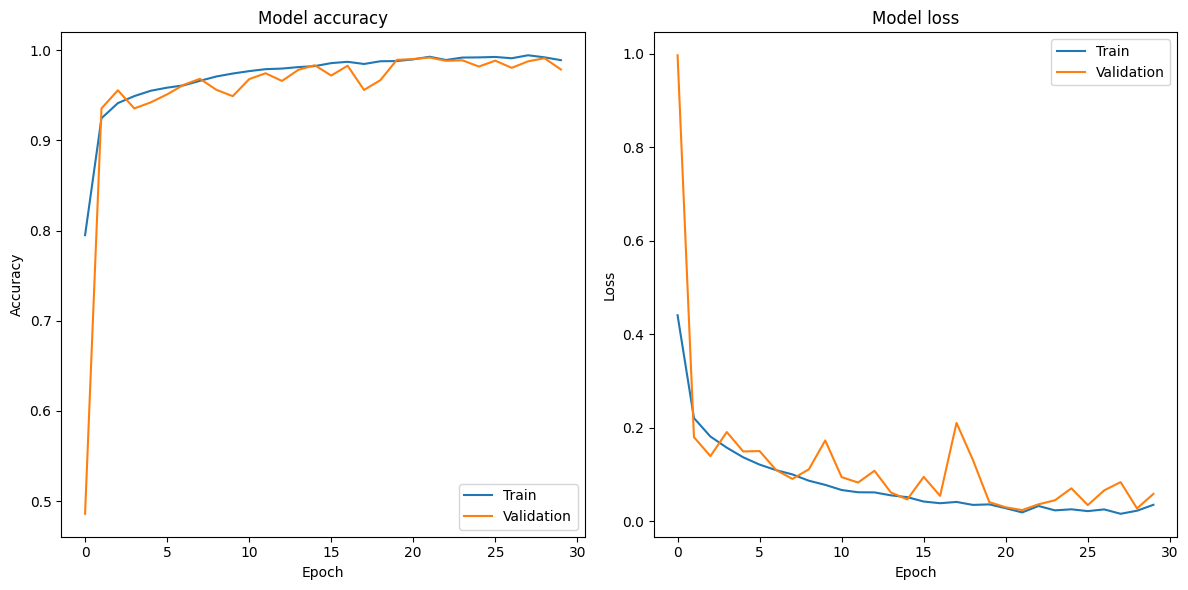

In [22]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

# SAVING THE MODEL

In [19]:
folder_path = r'.\model'

# Save the model in .h5 format
model.save(os.path.join(folder_path, "malaria_model.h5"))


In [20]:
# Save the model in .keras format

model.save(os.path.join(folder_path, "malaria_model.keras"))

# MAKING PREDICTIONS ON AN IMAGE

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 62ms/step


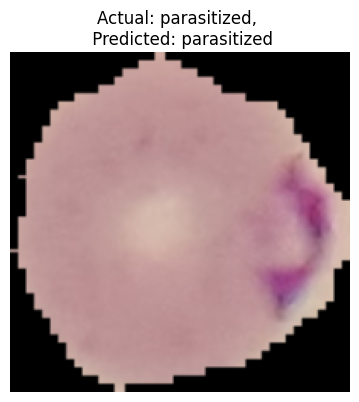

In [65]:
plt.figure(figsize=(15,15))
for images, labels in test_dataset.take(9) :
    for i in range(1):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy())

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}")
        plt.axis("off")


# RUNNING PREDICTIONS ON IMAGES WITH THE SAVED MODEL

1/1 [==============================] - 0s 305ms/step


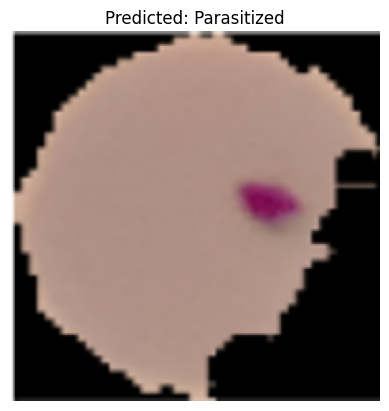

1/1 [==============================] - 0s 58ms/step


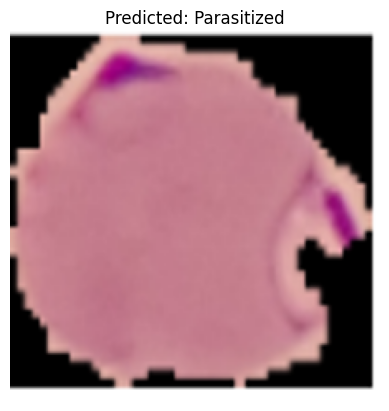

1/1 [==============================] - 0s 58ms/step


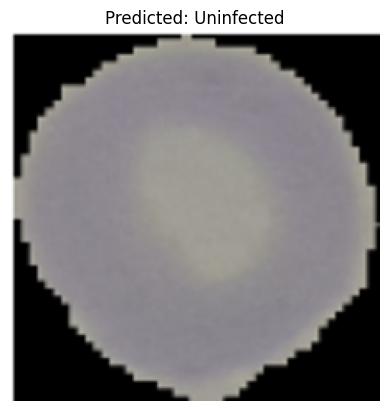

In [6]:
# Load the model
malaria_model = tf.keras.models.load_model(r".\model\malaria_model.h5")

image_path = r".\test_image"

# Get a list of image files in the folder
images = [f for f in os.listdir(image_path) if f.endswith(".jpg") or f.endswith(".jpeg")]

# Iterate over the images
for image_file in images:
    # Load the image
    img = Image.open(os.path.join(image_path, image_file))
    
    # Convert to RGB mode
    img = img.convert("RGB")
    
    # Resize the image
    desired_size = (224, 224)
    img = img.resize(desired_size)
    
    # Convert the image to numpy array and preprocess
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    
    # Expand dimensions to match model input shape
    img_array = tf.expand_dims(img_array, axis=0)
    
    # Make predictions using the model
    predictions = malaria_model.predict(img_array)
    predicted_class = "Uninfected" if predictions[0][0] > 0.5 else "Parasitized"
    
    # Display the image along with the prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()


# End